In [315]:
from ipywidgets import interact
from matplotlib import pyplot as plt
import numpy as np

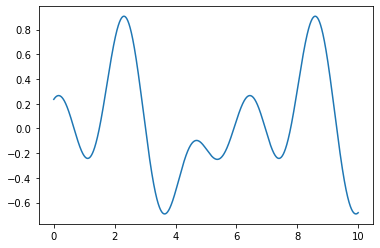

In [316]:
t = np.arange(0,10,0.001) # ms
s = 1/3 * np.sin(t) + 1/3 * np.sin(2*t + np.pi) + 1/3 * np.sin(3*t + np.pi / 4)
plt.plot(t, s)

In [328]:
@interact(f=(200, 10000))
def sample_rate(f = 600):
    
    n = f * np.round(t[-1]) * 1e-3
    txt = int(str(int(n))[-1])
    if txt == 1:
        txt = 'odabirak'
    elif txt > 0 and txt <= 4:
        txt = 'odabirka'
    else:
        txt = 'odabiraka'
    
    plt.title("Odabiranje signala (%i Hz ⇒ %i %s / 10ms)" % (f, n, txt))
    plt.xlabel("Vreme [ms]")
    plt.ylabel("Amplituda")
    plt.grid(False, which='major')
    plt.axhline(y=0, c="#000")
    
    mask = np.zeros(s.size, dtype=bool)
    mask[::int((s.size-1)/(n-1))] = 1
    
    plt.plot(t, s, linestyle='dotted', c='#666')
    if n < 50:
        plt.stem(t[mask], s[mask], basefmt='')
        plt.plot(t[mask], s[mask], c='k')
    else:
        plt.scatter(t[mask], s[mask])
        plt.plot(t[mask], s[mask], c='k')
    

interactive(children=(IntSlider(value=600, description='f', max=10000, min=200), Output()), _dom_classes=('wid…

In [313]:
@interact(r=(1, 8))
def sample_rate(r = 4):
    
    bins = np.array([x for x in range(2**r)])
    d = np.interp(s, (s.min(),s.max()), (0, 2**r - 1))
    
    plt.title("Rezolucija signala (%ibit ADC ⇒ %i nivoa)" % (r, 2**r))
    plt.xlabel("Vreme [ms]")
    plt.ylabel("Amplituda [bit]")
    plt.grid(False, which='major')
    
    if bins.size <= 16:
        plt.hlines(np.digitize(d,bins) - 1, t[0], t[-1], linestyles='solid', colors='#eee')
    plt.plot(t, d, linestyle='dotted', c='#666')
    plt.plot(t, np.digitize(d,bins - 0.5) - 1, c='k')


interactive(children=(IntSlider(value=4, description='r', max=8, min=1), Output()), _dom_classes=('widget-inte…